# 1. Introduction and Cleaning Data


We decide to study about the relations between the number of enrollments in a semester and the academic efficiency of the student. So we want to verify if exists a relation between those informations. 

First of all, we have to import the libraries that we are going to use to manipulate the data.

In [0]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

After import pandas, we use its function *read_csv* to read each csv file with information about classes and enrollments from 2016 and 2017 that we found on Open Data Portal of UFRN.

In [0]:
#Reading courses data csv
allcourses_ = pd.read_csv('http://dados.ufrn.br/dataset/08b0dc59-faa9-4281-bd1e-2a39f532489e/resource/949be3d1-e85b-4d0f-9f60-1d9a7484bb06/download/cursos-ufrn.csv',sep=';')

#Reading classes data csvs 
classes20161_ = pd.read_csv('http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/322d9977-ba15-47f1-8216-75a1ca78e197/download/turmas-2016.1.csv', sep=';')
classes20162_ = pd.read_csv('http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/5e8e3228-7f22-40a2-9efd-561c44844567/download/turmas-2016.2.csv', sep=';')
classes20171_ = pd.read_csv('http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/5e77d066-d506-45eb-a21e-76aa79616fef/download/turmas-2017.1.csv', sep=';')
classes20172_ = pd.read_csv('http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/01fe7343-fdf0-4a67-b915-2386b7c2fecb/download/turmas-2017.2.csv', sep=';')


#Reading enrollments data csvs
enrollments20161_ = pd.read_csv('http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/4778d3ce-8898-46a8-a623-ee6a480a2980/download/matriculas-de-2016.1.csv', sep=';')
enrollments20162_ = pd.read_csv('http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/f6179838-b619-4d7d-af9c-18c438b80dd4/download/matriculas-de-2016.2.csv', sep=';')
enrollments20171_ = pd.read_csv('http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/79071c21-e32c-438f-b930-d1b6ccc02ec2/download/matricula-componente-20171.csv', sep=';')
enrollments20172_ = pd.read_csv('http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/55dfe713-ff7c-4fa8-8d1d-d4294a025bff/download/matricula-componente-20172.csv', sep=';')


KeyboardInterrupt: ignored

In [0]:
#deletar 
allcourses = allcourses_

classes20161 = classes20161_
classes20162 = classes20162_
classes20171 = classes20171_
classes20172 = classes20172_

#Reading enrollments data csvs
enrollments20161 = enrollments20161_
enrollments20162 = enrollments20162_
enrollments20171 = enrollments20171_
enrollments20172 = enrollments20172_


Now we select just the informations about undergraduate students using the selecting_graduation_courses in each classes dataframe.

In [0]:
def selecting_graduation_courses(df) :
  return df.loc[df['nivel_ensino'] == 'GRADUAÇÃO']

In [0]:
classes20161 = selecting_graduation_courses(classes20161)
classes20162 = selecting_graduation_courses(classes20162)
classes20171 = selecting_graduation_courses(classes20171)
classes20172 = selecting_graduation_courses(classes20172)

allcourses = selecting_graduation_courses(allcourses)
classes20161['nivel_ensino'].unique()

array(['GRADUAÇÃO'], dtype=object)

In the enrollments each students is shown three times because each row is about a unit of the discipline, but in our studies we just need the information about the final grade. So we drop all duplicates lines by class id and student.

In [0]:
#Each student is shown 3 times for each enrollment, but the final grade is the same for all the 3, so we are filtering that
enrollments20161 = enrollments20161.drop_duplicates(subset = ['id_turma','discente'])
enrollments20162 = enrollments20162.drop_duplicates(subset = ['id_turma','discente'])
enrollments20171 = enrollments20171.drop_duplicates(subset = ['id_turma','discente'])
enrollments20172 = enrollments20172.drop_duplicates(subset = ['id_turma','discente'])


Now we drop all duplicates by class id to garantee that we have just one line with information about the class.

In [0]:
classes20161 = classes20161.drop_duplicates(subset = ['id_turma'])
classes20162 = classes20162.drop_duplicates(subset = ['id_turma'])
classes20171 = classes20171.drop_duplicates(subset = ['id_turma'])
classes20172 = classes20172.drop_duplicates(subset = ['id_turma'])

After clean the duplicate lines, we can merge the enrollments dataframes with the classes one.

In [0]:
#merging data
data20161 = pd.merge(left = classes20161,right = enrollments20161,on="id_turma",how= "outer")
data20162 = pd.merge(left = classes20162,right = enrollments20162,on="id_turma",how= "outer")
data20171 = pd.merge(left = classes20171,right = enrollments20171,on="id_turma",how= "outer")
data20172 = pd.merge(left = classes20172,right = enrollments20172,on="id_turma",how= "outer")

And we merge the result found before with courses information because we can have informations about the courses of each discipline. This information is going to be useful in one of our studies.

In [0]:
#selecting just the necessaries columns
allcourses =  allcourses.drop( allcourses.columns[2:], axis=1)

#merging data
data20161 = pd.merge(right = allcourses, left = data20161, on="id_curso",how="outer")
data20162 = pd.merge(right = allcourses,left = data20162,on="id_curso",how= "outer")
data20171 = pd.merge(right = allcourses,left = data20171,on="id_curso", how="outer")
data20172 = pd.merge(right= allcourses, left = data20172, on="id_curso", how="outer")

In [0]:
data20161.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210902 entries, 0 to 210901
Data columns (total 37 columns):
id_turma                    210900 non-null float64
codigo_turma                170557 non-null object
id_docente_interno          168990 non-null float64
id_docente_externo          1567 non-null float64
observacao                  98 non-null object
id_componente_curricular    170557 non-null float64
nivel_ensino                170557 non-null object
campus_turma                160799 non-null object
local                       170556 non-null object
ano                         170557 non-null float64
periodo                     170557 non-null float64
data_inicio                 170557 non-null object
data_fim                    170557 non-null object
descricao_horario           160233 non-null object
total_solicitacoes          168303 non-null float64
capacidade_aluno            170557 non-null float64
tipo                        170557 non-null object
distancia           

Now we have many columns (how we can see above) that we do not need, so we define a function to drop all collumns that are not used in our studies.

In [0]:
#removing columns that will not be used
def drop_columns(df):
    df.drop("unidade",inplace=True, axis=1)
    df.drop("nota",inplace=True, axis=1)
    df.drop("reposicao",inplace=True, axis=1)
    df.drop("faltas_unidade",inplace=True, axis=1)
    df.drop("observacao",inplace=True, axis=1)
    df.drop("campus_turma",inplace=True, axis=1)
    df.drop("local",inplace=True, axis=1)
    df.drop("ano",inplace=True, axis=1)
    df.drop("periodo",inplace=True, axis=1)
    df.drop("data_inicio",inplace=True, axis=1)
    df.drop("data_fim",inplace=True, axis=1)
    df.drop("distancia",inplace=True, axis=1)
    df.drop("data_consolidacao",inplace=True, axis=1)
    df.drop("total_solicitacoes",inplace=True, axis=1)
    df.drop("capacidade_aluno",inplace=True, axis=1)
    df.drop("qtd_aulas_lancadas",inplace=True, axis=1)
    df.drop("tipo",inplace=True, axis=1)
    df.drop("situacao_turma",inplace=True, axis=1)
    df.drop("convenio",inplace=True, axis=1)
    df.drop("modalidade_participantes",inplace=True, axis=1)
    df.drop("id_docente_interno",inplace = True ,axis=1)
    df.drop("id_docente_externo",inplace = True ,axis=1)
    df.drop("codigo_turma",inplace = True ,axis=1)
    df.drop("nivel_ensino",inplace = True ,axis=1)
    df.drop("agrupadora",inplace = True ,axis=1)
    df.drop("id_turma_agrupadora",inplace = True ,axis=1)
    df.drop("Unnamed: 25",inplace = True ,axis=1)
    df.drop("id_componente_curricular",inplace = True ,axis=1)
    df.rename(index=str, columns={'nome':'curso'},inplace=True)

drop_columns(data20161)
drop_columns(data20162)
drop_columns(data20171)
drop_columns(data20172)

In [0]:
print("2016.1 Info DataFrame")
print(data20161.info())
print("\n")
print("2016.2 Info DataFrame")
print(data20162.info())
print("\n")
print("2017.1 Info DataFrame")
print(data20171.info())
print("\n")
print("2017.2 Info DataFrame")
print(data20172.info())

2016.1 Info DataFrame
<class 'pandas.core.frame.DataFrame'>
Index: 210902 entries, 0 to 210901
Data columns (total 9 columns):
id_turma               210900 non-null float64
descricao_horario      160233 non-null object
discente               210582 non-null object
id_curso               208917 non-null float64
media_final            170198 non-null float64
numero_total_faltas    175944 non-null float64
descricao              210582 non-null object
Unnamed: 10            0 non-null float64
curso                  169165 non-null object
dtypes: float64(5), object(4)
memory usage: 16.1+ MB
None


2016.2 Info DataFrame
<class 'pandas.core.frame.DataFrame'>
Index: 186154 entries, 0 to 186153
Data columns (total 9 columns):
id_turma               186154 non-null int64
descricao_horario      150152 non-null object
discente               185785 non-null object
id_curso               184116 non-null float64
media_final            153101 non-null float64
numero_total_faltas    158679 non-null fl

In 'data20161' and 'data20162' exist a column named "Unnamed 10" with all values null , so we drop this columns becaus it's unnecessary.

In [0]:
def drop_specific_column(df):
    df.drop("Unnamed: 10",inplace=True,axis=1)
drop_specific_column(data20161)
drop_specific_column(data20162)

In [0]:
data20162.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186154 entries, 0 to 186153
Data columns (total 8 columns):
id_turma               186154 non-null int64
descricao_horario      150152 non-null object
discente               185785 non-null object
id_curso               184116 non-null float64
media_final            153101 non-null float64
numero_total_faltas    158679 non-null float64
descricao              185785 non-null object
curso                  154998 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 12.8+ MB


After clean the columns we have to clean the null values in *discente*, *descricao* and *curso* columns.

In [0]:
#removing data null
def remove_null(df):
    df.drop(df[df.discente.isnull()].index,inplace = True)
    df.drop(df[df.descricao.isnull()].index,inplace = True)
    df.drop(df[df.curso.isnull()].index,inplace = True)

remove_null(data20161)
remove_null(data20162)
remove_null(data20171)
remove_null(data20172)

We define a function to discard all enrollments that the description does not refers to a situation where the student effectively attended the discipline, like canceled, deleted, waived and pending deferment.

In [0]:
def drop_unnecessary_enrollment_description(df):
  df.drop(df[df.descricao == 'CANCELADO'].index, inplace=True)
  df.drop(df[df.descricao == 'EXCLUIDA'].index, inplace=True)
  df.drop(df[df.descricao == 'INDEFERIDO'].index, inplace=True)
  df.drop(df[df.descricao == 'AGUARDANDO DEFERIMENTO'].index, inplace=True)

In [0]:
drop_unnecessary_enrollment_description(data20161)
drop_unnecessary_enrollment_description(data20162)
drop_unnecessary_enrollment_description(data20171)
drop_unnecessary_enrollment_description(data20172)

An important information to our studies is the number of enrollments of each students have. We want to know how many disciplines they are registred. So we define a function to calculate this number here.

In [0]:
def num_enrollments(df):
    a = df.discente.value_counts()
    def funcenrollments(row):
        return a[row.discente]
    df['num_matriculas'] =df.apply(funcenrollments, axis=1)

num_enrollments(data20161)
num_enrollments(data20162)
num_enrollments(data20171)
num_enrollments(data20172)


Now we can see all data almost ready to use in our studies.

In [0]:
data20171.head()

,id_turma,descricao_horario,discente,id_curso,media_final,numero_total_faltas,descricao,curso,num_matriculas
0,57593679.0,3T234 4T34,e03b495e653c10440f422bb036a5c0f3,2000059.0,7.8,13.0,APROVADO,ODONTOLOGIA,5
2,57593679.0,3T234 4T34,d5c4d1c815ebc2673ba07f6738aa04ef,2000059.0,8.6,6.0,APROVADO,ODONTOLOGIA,5
3,57593679.0,3T234 4T34,3d296ca779d5bb81ee53fcc1f42c0e94,2000059.0,8.0,2.0,APROVADO,ODONTOLOGIA,5
4,57593679.0,3T234 4T34,aeb4814f025ab772ae46574ef48d82a4,2000059.0,8.3,9.0,APROVADO,ODONTOLOGIA,5
5,57593679.0,3T234 4T34,da8f0a203f74f319d9f5112d3a9fbaec,2000059.0,8.1,10.0,APROVADO,ODONTOLOGIA,5


In [0]:

data20171.loc[data20171["discente"]=="da8f0a203f74f319d9f5112d3a9fbaec"]

,id_turma,descricao_horario,discente,id_curso,media_final,numero_total_faltas,descricao,curso,num_matriculas
5,57593679.0,3T234 4T34,da8f0a203f74f319d9f5112d3a9fbaec,2000059.0,8.1,10.0,APROVADO,ODONTOLOGIA,5
63,57593790.0,234M1234 6M12,da8f0a203f74f319d9f5112d3a9fbaec,2000059.0,7.3,0.0,APROVADO,ODONTOLOGIA,5
161,57594924.0,246T12,da8f0a203f74f319d9f5112d3a9fbaec,2000059.0,7.8,2.0,APROVADO,ODONTOLOGIA,5
1264,57596541.0,5T2345 (16/03/2017 - 18/05/2017),da8f0a203f74f319d9f5112d3a9fbaec,2000059.0,9.0,0.0,APROVADO,ODONTOLOGIA,5
1738,57598990.0,5M2345 (13/02/2017 - 01/07/2017),da8f0a203f74f319d9f5112d3a9fbaec,2000059.0,9.3,0.0,APROVADO,ODONTOLOGIA,5


We decide to check the outliers to discar them of the data bases.

In [0]:
data20171.num_matriculas.describe()

count    137383.000000
mean          6.525240
std           2.878039
min           1.000000
25%           5.000000
50%           6.000000
75%           7.000000
max          24.000000
Name: num_matriculas, dtype: float64

In [0]:
#TODO: usar formula generica que esta no estudo 2
def remove_outliers(df):
    lsup = 7.132767+1.5*4
    lsup
    df.drop(df[df.num_matriculas > lsup].index,inplace = True)

remove_outliers(data20161)
remove_outliers(data20162)
remove_outliers(data20171)
remove_outliers(data20172)


Now all the dataframes are ready to use in our studies

# 2. The Relation between the Number of Enrollments of a Student and the Approvals



The first study is about the relation between the amount of enrollments and the success of the student being approved. So we start to copy the dataframes, because if we need to change it to produce some result in this study, we do not interfere in the others studies.

In [0]:
#Copying the data to do local changes
study1_20161=data20161
study1_20162=data20162
study1_20171=data20171
study1_20172=data20172

This function is used to filter the pivot table values to avoid that the same student is count more than once.



In [0]:
def count_unique_discente(x):
    return len(x.unique().tolist())

Working with such a large data frame can be confusing, so let's group the information we want for this study, already making the clustering calculations necessary for visualization.


In [0]:
#amount of results according to the number of enrollments 2016.1-2018.2
study20161 = study1_20161.pivot_table(index="descricao",columns='num_matriculas',values='discente',aggfunc=count_unique_discente)
study20162 = study1_20162.pivot_table(index="descricao",columns='num_matriculas',values='discente',aggfunc=count_unique_discente)
study20171 = study1_20171.pivot_table(index="descricao",columns='num_matriculas',values='discente',aggfunc=count_unique_discente)
study20172 = study1_20172.pivot_table(index="descricao",columns='num_matriculas',values='discente',aggfunc=count_unique_discente)


With the data grouped, we can then plot a heatmap chart to visualize the data clearly.


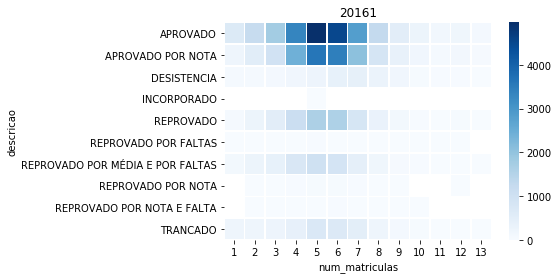

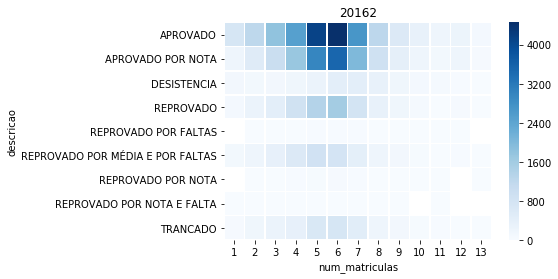

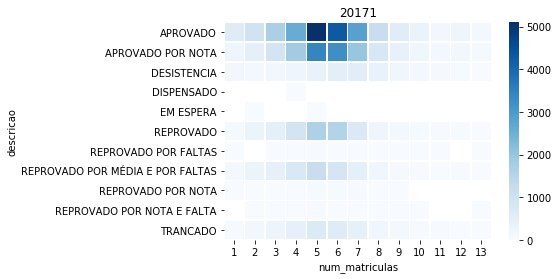

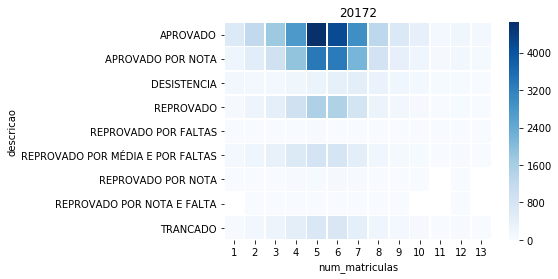

In [0]:
sns.heatmap(study20161, linewidth=0.5,cmap="Blues")
plt.title("20161")
plt.show()

sns.heatmap(study20162, linewidth=0.5,cmap="Blues")
plt.title("20162")
plt.show()

sns.heatmap(study20171, linewidth=0.5,cmap="Blues")
plt.title("20171")
plt.show()

sns.heatmap(study20172, linewidth=0.5,cmap="Blues")
plt.title("20172")
plt.show()


Based on the above graphs we can conclude:
*   Most students are APPROVED (average over 7)

*   Students enrolled in 6 subjects are the ones who achieve the highest approval, it is also noticeable that the number 6 of enrollments is where the largest number of students

*   The behavior is very close in all four analyzed semesters.

From the chart above we can draw a lot of information, but it is still superficial. We can explore more data, filtering the students approved and approved by note counting the total approval of a student in a new column.


# 3. rate of approval by number of enrollments




In [0]:
#calculando quantidade de aprovacoes
def aprovacao(df):
    def aprovado(row):
        return row.descricao == 'APROVADO' or row.descricao == 'APROVADO POR NOTA'
    df['aprovado'] = df.apply(aprovado, axis=1)

In [0]:
#calculando quantidade de aprovacoes e fazendo um merge com o dataframe do estudo

aprovacao(study1_20162)
table = study1_20162.pivot_table(index="discente",values='aprovado',aggfunc=sum)
table.reset_index(level=0, inplace=True)
table.columns = ['discente','num_aprovacoes']
study1_20162 = pd.merge(right = study1_20162,left = table,on="discente",how= "outer")

aprovacao(study1_20171)
table = study1_20171.pivot_table(index="discente",values='aprovado',aggfunc=sum)
table.reset_index(level=0, inplace=True)
table.columns = ['discente','num_aprovacoes']
study1_20171 = pd.merge(right = study1_20171,left = table,on="discente",how= "outer")

aprovacao(study1_20172)
table = study1_20172.pivot_table(index="discente",values='aprovado',aggfunc=sum)
table.reset_index(level=0, inplace=True)
table.columns = ['discente','num_aprovacoes']
study1_20172 = pd.merge(right = study1_20172,left = table,on="discente",how= "outer")

aprovacao(study1_20161)
table = study1_20161.pivot_table(index="discente",values='aprovado',aggfunc=sum)
table.reset_index(level=0, inplace=True)
table.columns = ['discente','num_aprovacoes']
study1_20161 = pd.merge(right = study1_20161,left = table,on="discente",how= "outer")


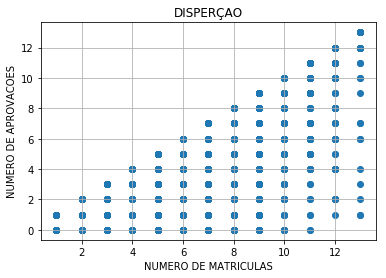

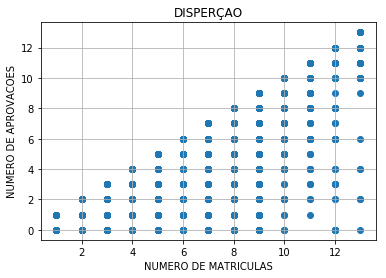

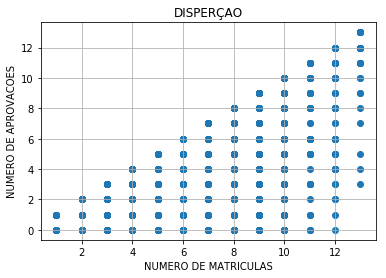

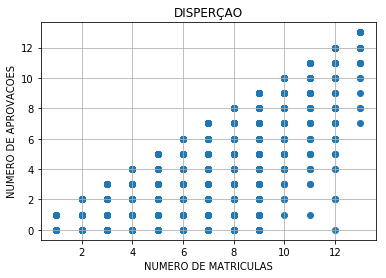

In [0]:
#vizualizando dados por grafico de disperção, porem nao da para vizualizar muito bem
df = study1_20162.drop_duplicates(subset="discente")
plt.scatter(df["num_matriculas"],df["num_aprovacoes"])
plt.title("DISPERÇAO")
plt.grid(True)
plt.xlabel("NUMERO DE MATRICULAS")
plt.ylabel("NUMERO DE APROVACOES")
plt.show()
df = study1_20171.drop_duplicates(subset="discente")
plt.scatter(df["num_matriculas"],df["num_aprovacoes"])
plt.title("DISPERÇAO")
plt.grid(True)
plt.xlabel("NUMERO DE MATRICULAS")
plt.ylabel("NUMERO DE APROVACOES")
plt.show()
df = study1_20172.drop_duplicates(subset="discente")
plt.scatter(df["num_matriculas"],df["num_aprovacoes"])
plt.title("DISPERÇAO")
plt.grid(True)
plt.xlabel("NUMERO DE MATRICULAS")
plt.ylabel("NUMERO DE APROVACOES")
plt.show()
df = study1_20161.drop_duplicates(subset="discente")
plt.scatter(df["num_matriculas"],df["num_aprovacoes"])
plt.title("DISPERÇAO")
plt.grid(True)
plt.xlabel("NUMERO DE MATRICULAS")
plt.ylabel("NUMERO DE APROVACOES")
plt.show()

It is difficult to analyze the dispersion graph because the amount of data is extremely large and the graph is concentrated. So let's create smaller dataframe only with the enrollment numbers and approval numbers of the four semesters so we can group them into a single array.


In [0]:
#20161
list_of_series =(study1_20162["num_matriculas"],study1_20162["num_aprovacoes"])
a = pd.concat(list_of_series, axis=1)
a["num_matriculas"] = a["num_matriculas"].astype(int)
a["num_aprovacoes"] = a["num_aprovacoes"].astype(int)
#20162
list_of_series =(study1_20171["num_matriculas"],study1_20171["num_aprovacoes"])
b = pd.concat(list_of_series, axis=1)
b["num_matriculas"] = b["num_matriculas"].astype(int)
b["num_aprovacoes"] = b["num_aprovacoes"].astype(int)
#20171
list_of_series =(study1_20172["num_matriculas"],study1_20172["num_aprovacoes"])
c = pd.concat(list_of_series, axis=1)
c["num_matriculas"] = c["num_matriculas"].astype(int)
c["num_aprovacoes"] = c["num_aprovacoes"].astype(int)
#20172
list_of_series =(study1_20161["num_matriculas"],study1_20161["num_aprovacoes"])
d = pd.concat(list_of_series, axis=1)
d["num_matriculas"] = d["num_matriculas"].astype(int)
d["num_aprovacoes"] = d["num_aprovacoes"].astype(int)

In [0]:
matrix = np.zeros(shape=(13,14))
def probabilidade(row):
    matrix[row.num_matriculas-1][row.num_aprovacoes] += 1

In [0]:
a.apply(probabilidade, axis=1)
b.apply(probabilidade, axis=1)
c.apply(probabilidade, axis=1)
d.apply(probabilidade, axis=1)
a.head()


,num_matriculas,num_aprovacoes
0,6,5
1,6,5
2,6,5
3,6,5
4,6,5


Text(0.5, 15.0, 'NUMERO DE APROVACOES')

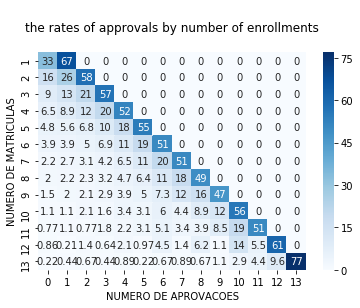

In [0]:
#data frame/matrix quadrada numero de matriculas por numero de aprovacoes(em porcetagem)
result = pd.DataFrame(matrix,index=['1','2','3','4','5','6','7','8','9','10','11','12','13'],columns=['0','1','2','3','4','5','6','7','8','9','10','11','12','13'])
result[['0','1','2','3','4','5','6','7','8','9','10','11','12','13']] = result[['0','1','2','3','4','5','6','7','8','9','10','11','12','13']].apply(lambda x: (x/x.sum())*100, axis=1)
result.style.set_precision(3)
sns.heatmap(result,annot=True,cmap="Blues")
plt.title("\nthe rates of approvals by number of enrollments\n")

plt.ylabel("NUMERO DE MATRICULAS")
plt.xlabel("NUMERO DE APROVACOES")

After filtering and grouping the data of the four analyzed semesters, we arrive at this graph, which shows the approval rate that each group of students (by number of registrations).

This is the general picture of ufrn considering several courses and areas. 

We see that lower enrollment rates have a high approval rate and that the study end (13 enrollments) also have a high rate (46%). 

Students with high numbers (8 to 11) are the students who are least approved in all subjects, their rates are well dispersed.


# 4. The Relation between the Number of Enrollments of a Student and the Absenteeism

We have to relate the total number of absence with the number of enrollments of each student, to discover what the relation between these informations.

In [0]:
#Copying the data to do local changes
study2_20161=data20161
study2_20162=data20162
study2_20171=data20171
study2_20172=data20172

After copy the data bases, we remove the number of absence that is discrepant, to become this more realistic study.

In [0]:
#function to define the outlier upper limit of absences
def drop_outliers_sup(data_pandas):
  first_quatil = data_pandas.quantile(0.25)
  third_quatil = data_pandas.quantile(0.75)
  iqr = third_quatil - first_quatil
  sup = (third_quatil + 1.5) * iqr
  return sup

In [0]:
sup_20161 = drop_outliers_sup(study2_20161.numero_total_faltas)
study2_20161 = study2_20161[~(study2_20161.numero_total_faltas > sup_20161)]

sup_20162 = drop_outliers_sup(study2_20162.numero_total_faltas)
study2_20162 = study2_20162[~(study2_20162.numero_total_faltas > sup_20162)]

sup_20171 = drop_outliers_sup(study2_20171.numero_total_faltas)
study2_20171 = study2_20171[~(study2_20171.numero_total_faltas > sup_20171)]

sup_20172 = drop_outliers_sup(study2_20172.numero_total_faltas)
study2_20172 = study2_20172[~(study2_20172.numero_total_faltas > sup_20172)]


After clean the data bases, we define a function that return a dictionary where the key is the number of enrollments and the value is the average of the number of absence of the students that are enrollment in this amount of enrollments.

In [0]:
def dictionary_nenrollments_absence(df) :
  dict = {}
  list = df.num_matriculas.unique()
  for num_mat in list :
    dict[num_mat] = df.loc[df.num_matriculas == num_mat].numero_total_faltas.std()
  return dict

In [0]:
dict20161 = dictionary_nenrollments_absence(study2_20161)
dict20162 = dictionary_nenrollments_absence(study2_20162)
dict20171 = dictionary_nenrollments_absence(study2_20171)
dict20172 = dictionary_nenrollments_absence(study2_20172)

The dictionaries allow us to generate a graph that shows the relation between those informations: enrollments and absences.

In [0]:
def create_graph_study2(dict, semester) :
  plt.bar(dict.keys(), dict.values()) #Criando o gráfico
  plt.title('Relação do Número de Disciplinas Matriculadas com Número de Faltas - '+ semester) #adicionando o título
  plt.xlabel('Quantidade de Disciplinas')
  plt.ylabel('Número de Faltas (Média)')
  plt.show()

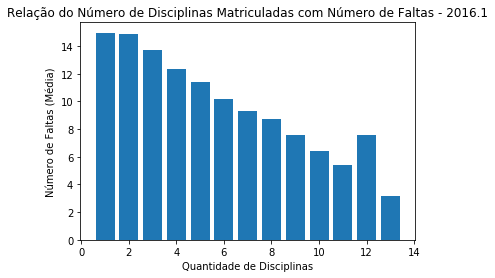

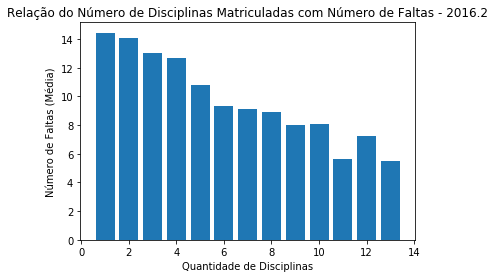

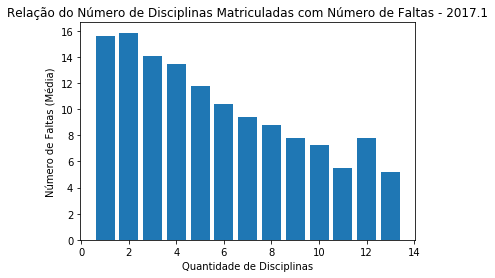

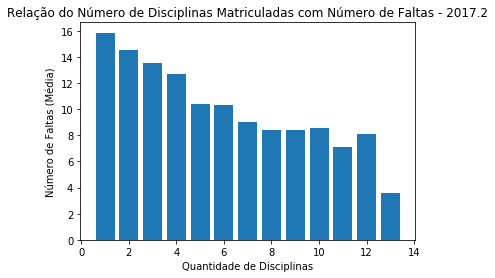

In [0]:
create_graph_study2(dict20161, "2016.1")
create_graph_study2(dict20162, "2016.2")
create_graph_study2(dict20171, "2017.1")
create_graph_study2(dict20172, "2017.2")

# 5. The Relation between the Numer of Enrollments of a Student and the Final Grade with the Average Course Grade

In this study we don't think about the data distribuited in semesters, so we concatenate all data frames to use them together.

In [0]:
#we concatenate the dataframes
study21adm = pd.concat([data20161,data20162,data20171,data20172])
study22medicine = pd.concat([data20161,data20162,data20171,data20172])
study23ti = pd.concat([data20161,data20162,data20171,data20172])

So we decide to choose three important courses of UFRN, that is Business, Information Technology and Medicine.

In [0]:
#we choose these courses: Administração, medicina Bacharel em Tecnologia da Informação
# study21 = study21.pivot_table(index="id_turma",columns='num_matriculas',values='media_final',aggfunc='count')
mean20162 = study21adm.pivot_table(index="discente", values="media_final", aggfunc=np.mean)
mean20171 = study22medicine.pivot_table(index="discente", values="media_final", aggfunc=np.mean)
mean20172 = study23ti.pivot_table(index="discente",values="media_final", aggfunc=np.mean)
def store_values20162(row):
    return mean20162.get_value(row.discente, 'media_final')
study21adm['media_final'] = study21adm.apply(store_values20162, axis=1)
def store_values20171(row):
    return mean20171.get_value(row.discente, 'media_final')
study22medicine['media_final'] = study22medicine.apply(store_values20171, axis=1)
def store_values20172(row):
    return mean20172.get_value(row.discente, 'media_final')
study23ti['media_final'] = study23ti.apply(store_values20172, axis=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


KeyError: ignored

In [0]:
#administração
pivotstudy21adm= study21adm.pivot_table(index='curso',values='media_final', aggfunc=np.mean)
study21adm = study21adm.pivot_table(index='curso',columns='num_matriculas', values='media_final', aggfunc=np.mean)

#medicina
pivotstudy22medicine = study22medicine.pivot_table(index='curso',values='media_final', aggfunc=np.mean)
study22medicine = study22medicine.pivot_table(index='curso', columns='num_matriculas',values='media_final', aggfunc=np.mean)
#TI
pivotstudy23ti = study23ti.pivot_table(index='curso',values='media_final', aggfunc=np.mean)
study23ti = study23ti.pivot_table(index='curso',columns='num_matriculas',values='media_final',aggfunc=np.mean)


In [0]:
#reset the dataframes index
pivotstudy21adm.reset_index(level=0,inplace=True)
study21adm.reset_index(level=0,inplace=True)

pivotstudy22medicine.reset_index(level=0,inplace=True)
study22medicine.reset_index(level=0, inplace=True)

pivotstudy23ti.reset_index(level=0,inplace=True)
study23ti.reset_index(level=0,inplace=True)





Now we use dictionaries to store the main informations to generate a graph that show the relation between the students final grade and the number of enrollments with the average course grade.

In [0]:
#administracao
dictionaryadmins = {}
meansadmin = {}
meansEnemadm = {}
list = study21adm

for media_finals in list :
  dictionaryadmins[media_finals] = study21adm.loc[0][media_finals]
  meansadmin[media_finals] = pivotstudy21adm.loc[0][1]
  meansEnemadm[media_finals] = 6.534 #media do enem de manhã e noite, além de ser de acordo com os anos e dividido por 1000
  
del dictionaryadmins["curso"]
del meansadmin["curso"]
del meansEnemadm["curso"]


plt.plot(dictionaryadmins.keys(), dictionaryadmins.values(),label="Média dos alunos de administração",color="black",marker='s',animated=True)
plt.plot(meansadmin.keys(),meansadmin.values(), label='média do curso de adminitração')
plt.plot(meansEnemadm.keys(),meansEnemadm.values(), label='Média do ENEM',linestyle=':')
plt.title('Relação entre a quantidade de matérias pagas, a média do curso e a média de corte do ENEM no curso de ADMINISTRAÇÃO')
plt.xlabel('Quantidade de Disciplinas')
plt.ylabel('Média Final')
plt.show()


#medicina
dictionarymedi = {}
meansmedi = {}
meansEnemmedi = {}


list = study22medicine

for media_finals in list:
   dictionarymedi[media_finals] = study22medicine.loc[66][media_finals]
   meansmedi[media_finals] = pivotstudy22medicine.loc[66][1]
   meansEnemmedi[media_finals]= 7.712 #media do enem integral, dividida por 1000

del dictionarymedi["curso"]
del meansmedi["curso"]
del meansEnemmedi["curso"]
plt.plot(dictionarymedi.keys(), dictionarymedi.values(),label="Média dos alunos de Medicina",color="black",marker='s',animated=True)
plt.plot(meansmedi.keys(),meansmedi.values(), label='média do curso de Medicina')
plt.plot(meansEnemmedi.keys(),meansEnemmedi.values(), label='Média do ENEM',linestyle=':')
plt.title('Relação entre a quantidade de matérias pagas, a média do curso e a média de corte do ENEM no curso de Medicina')
plt.xlabel('Quantidade de Disciplinas')
plt.ylabel('Média Final')
plt.show()


#TI
dicionarti = {}
meansti = {}
meansEnemTI = {}

list = study23ti

for media_finals in list:
  dicionarti[media_finals] = study23ti.loc[78][media_finals]
  meansti[media_finals] = pivotstudy23ti.loc[78][1]
  meansEnemTI[media_finals]= 	6.50
del dicionarti["curso"]
del meansti["curso"]
del meansEnemTI["curso"]
plt.plot(dicionarti.keys(), dicionarti.values(),label="Média dos alunos de Tecnologia da informação",color="black",marker='s',animated=True)
plt.plot(meansti.keys(),meansti.values(), label='média do curso de Tecnologia da Informação')
plt.plot(meansEnemTI.keys(),meansEnemTI.values(), label='Média do ENEM',linestyle=':')
plt.title('Relação entre a quantidade de matérias pagas, a média do curso e a média de corte do ENEM no curso de Tecnologia da informação')
plt.xlabel('Quantidade de Disciplinas')
plt.ylabel('Média Final')
plt.show()
    

   


primeiramente, nós podemos concluir que cada curso tem sua particularidade, administração possui uma peculiaridade, pois quando se paga mais de 8 matérias a média dos alunos tende ficar abaixo da média do curso, entretanto existe um aluno pagando 11 disciplinas que conseguiu reverter esse caso! pois, sua média é de 9.3.
Medicina possui uma peculiaridade, poisa sua média é bem alta, e os alunos que pagam 13 disciplinas, também conseguem manter a média alta, apesar de ser menor que a média do curso!
Tecnologia da informação, o ideal para se pagar em TI é de 5 a 8 disciplinas, pois depois das 8 disciplinas possui um risco muito alto da média ser menor que a média normal do curso, que é baixa! NÃO existe alunos em TI pagando mais de 10 disciplinas!

In [0]:
study21adm

# 6. Conclusion